In [1]:
import re
import numpy as np
import pandas as pd
from math import * 
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline

In [2]:
time_data = pd.read_csv('../Source/2018_calendar.csv', delimiter=',')


In [3]:
time_data['price'] = time_data['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)
time_data['log_price'] = np.log(time_data['price'].values)

In [4]:

time_data

,listing_id,date,available,price,log_price
0,16457286,2018-01-11,f,NaN,NaN
1,16457286,2018-01-12,f,NaN,NaN
2,16457286,2018-01-13,f,NaN,NaN
3,16457286,2018-01-14,f,NaN,NaN
4,16457286,2018-01-15,f,NaN,NaN
5,16457286,2018-01-16,f,NaN,NaN
6,16457286,2018-01-17,f,NaN,NaN
7,16457286,2018-01-18,f,NaN,NaN
8,16457286,2018-01-19,f,NaN,NaN
9,16457286,2018-01-20,f,NaN,NaN


In [5]:
time_data.size

88731500

In [6]:
# Only consider data for which there is data
nan_adjusted = time_data[np.isfinite(time_data['log_price'])]

In [7]:
#Still left with a reasonable amount of observations
nan_adjusted.size

30475005

In [8]:

# Group by listing_id, then find each listing id's average price
grouped = nan_adjusted.groupby(['listing_id'], as_index = False)

means = grouped['price'].mean().values
log_means = grouped['log_price'].mean().values

In [9]:
mean_df = grouped.mean()
mean_df['listing_id']

0            2515
1            2539
2            2595
3            3330
4            3647
5            3831
6            4611
7            4989
8            5054
9            5121
10           5135
11           5178
12           5238
13           5295
14           5441
15           5803
16           5945
17           6090
18           6848
19           6990
20           7097
21           7241
22           7322
23           7748
24           7801
25           7816
26           8024
27           8025
28           8110
29           8225
           ...   
31785    22656685
31786    22656871
31787    22656994
31788    22657120
31789    22657161
31790    22658582
31791    22659217
31792    22659796
31793    22660201
31794    22664180
31795    22664800
31796    22665286
31797    22665392
31798    22665675
31799    22666216
31800    22666545
31801    22666569
31802    22667087
31803    22667161
31804    22667271
31805    22667295
31806    22667496
31807    22667649
31808    22667815
31809    2

In [10]:

# Maybe I need to reset the index, who the hell knows if I'll use this later
nan_adjusted.reset_index(inplace=True)

In [13]:
# Initialize an empty column for the price differences 
nan_adjusted['price_diff'] = 0

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
mean_df.head()

,listing_id,price,log_price
0,2515,92.767918,4.502341
1,2539,74.285714,4.134603
2,2595,225.391781,5.415380
3,3330,70.000000,4.248495
4,3647,150.000000,5.010635


In [51]:
counter = 0

def make_adjusted_price(row_from_nanadjusted):
    global counter
    counter += 1
    if counter % 10000 == 0:
        print(f'finished {counter} rows')
    original_price = row_from_nanadjusted['price']
    listing_id = row_from_nanadjusted['listing_id']
    
    price_adjustment = mean_df[mean_df['listing_id'] == listing_id]['price'].values[0]
    
    return original_price - price_adjustment

nan_adjusted_small = nan_adjusted.iloc[:2000]
new_prices = nan_adjusted_small.apply(make_adjusted_price, axis=1)
new_prices

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
11       0.000000
12       0.000000
13       0.000000
14       0.000000
15       0.000000
16       0.000000
17       0.000000
18       0.000000
19       0.000000
20       0.000000
21       0.000000
22       0.000000
23       0.000000
24       0.000000
25       0.000000
26       0.000000
27       0.000000
28       0.000000
29       0.000000
          ...    
1970     5.330189
1971     5.330189
1972     5.330189
1973     5.330189
1974     5.330189
1975     5.330189
1976     5.330189
1977     5.330189
1978     5.330189
1979     5.330189
1980     5.330189
1981     5.330189
1982     5.330189
1983     5.330189
1984     5.330189
1985     5.330189
1986     5.330189
1987     5.330189
1988     5.330189
1989     5.330189
1990    -1.669811
1991    -2.669811
1992    -4.669811
1993    -4.669811
1994    -9

In [52]:
nan_adjusted.head()

,index,listing_id,date,available,price,log_price,price_diff
0,365,1356652,2018-01-11,t,90.0,4.49981,0
1,366,1356652,2018-01-12,t,90.0,4.49981,0
2,367,1356652,2018-01-13,t,90.0,4.49981,0
3,368,1356652,2018-01-14,t,90.0,4.49981,0
4,369,1356652,2018-01-15,t,90.0,4.49981,0


In [53]:
mean_df_new = mean_df[['listing_id','price']]

In [54]:
nan_adjusted = time_data[np.isfinite(time_data['log_price'])]

In [55]:
new = nan_adjusted.merge(mean_df_new,how='left', left_on='listing_id', right_on='listing_id')

In [56]:

# Compute price differences 
new['price_diff'] = new['price_x'] - new['price_y']

In [58]:
# Convert dates to datetime
dates = pd.to_datetime(new['date'].values)
dates

DatetimeIndex(['2018-01-11', '2018-01-12', '2018-01-13', '2018-01-14',
               '2018-01-15', '2018-01-16', '2018-01-17', '2018-01-18',
               '2018-01-19', '2018-01-20',
               ...
               '2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10'],
              dtype='datetime64[ns]', length=6095001, freq=None)

In [59]:
# Add new datetime object
new['datetime'] = dates
new.head()

,listing_id,date,available,price_x,log_price,price_y,price_diff,datetime
0,1356652,2018-01-11,t,90.0,4.49981,90.0,0.0,2018-01-11
1,1356652,2018-01-12,t,90.0,4.49981,90.0,0.0,2018-01-12
2,1356652,2018-01-13,t,90.0,4.49981,90.0,0.0,2018-01-13
3,1356652,2018-01-14,t,90.0,4.49981,90.0,0.0,2018-01-14
4,1356652,2018-01-15,t,90.0,4.49981,90.0,0.0,2018-01-15


In [61]:
# Groupby datetime, get average price difference
final = new.groupby(['datetime'], as_index = False)
final_sums = final['price_diff'].mean()
final_sums.head()

,datetime,price_diff
0,2018-01-10,-20.739908
1,2018-01-11,-21.397842
2,2018-01-12,-10.107366
3,2018-01-13,-7.087179
4,2018-01-14,-14.725737


In [62]:
print("Number of days average price difference was positive:", sum(final_sums['price_diff']>0) )

Number of days average price difference was positive: 250


In [64]:
final_sums['datetime'].head()

0   2018-01-10
1   2018-01-11
2   2018-01-12
3   2018-01-13
4   2018-01-14
Name: datetime, dtype: datetime64[ns]

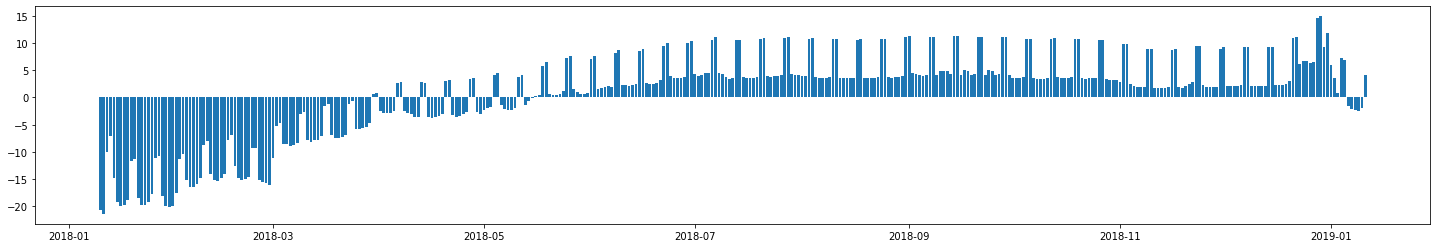

In [69]:
# Examine overall price difference trend

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
plt.bar(x=final_sums['datetime'], height=final_sums['price_diff'])
# ax.set_xticklabels(final_sums['listing_id'])

# ax.set_xlabel('Date')
# ax.set_ylabel('Avg Price Difference')
# ax.set_title('Days When List Price Exceeded Average List Price for Individual AirBnbs')

plt.show()